<h1>Notbook do analizy wyników algorytmu PSO dla 1200 próbek po od 4-15 miast wykonanych dla różnych wartości warametrów alpha i beta z przedziału 0.1 - 0.9</h1>

1. Import bibliotek

In [32]:
import pandas as pd
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from builders.PathBuilder import PathBuilder
from constants.AlgNamesResults.names import *
from os.path import exists
import seaborn as sns
%matplotlib inline

2. Przygotowanie fuknkcjie i zmiennych do ekstrakcji danych z plików CSV

In [33]:
MEASUREMENTS = "measurements"
NAME_DIR_WITH_RESULTS_CSV = "pso_test_alpha_beta_range_from_0_1_to_0_9"
CSV = "csv"
CPU = "CPU"
TIME_AND_DATA = "TIME_AND_DATA"
TIME_AND_MEMORY = "TIME_AND_MEMORY"
DEFAULT_COLUMNS = ["number_of_cities", "index_of_sample",]
FEATURE_COLUMNS = []
BASIC_COLUMNS = DEFAULT_COLUMNS + FEATURE_COLUMNS
CPU_COLUMNS = BASIC_COLUMNS + []
TIME_AND_DATA_COLUMNS = BASIC_COLUMNS + [
                                           "best_way_is_optimal",
                                           "relative_distance_error",
                                           "time_duration_is_sec "
                                          ]
TIME_AND_MEMORY_COLUMNS = BASIC_COLUMNS + []
#NAME OF PARAMETERS
ALPHA = "ALPHA"
BETA = "BETA"
CSV_NAME = "CSV_NAME"


def generate_name_of_csv_pso(type_measurement, population, alpha, beta, nr_iter):
    pattern_suffix = "%s_PSO_POP_%d_ALPHA_%s_BETA_%s_NR_ITER_%d"
    alpha_str = str(alpha).replace(".", "_")
    beta_str = str(beta).replace(".", "_")
    return pattern_suffix % (type_measurement, population, alpha_str, beta_str, nr_iter)


def generate_config_combinations(type_of_measure):
    CONFIGURATIONS = list()
    pattern_suffix = "%s_PSO_POP_%d_ALPHA_%s_BETA_%s_NR_ITER_%d"
    size_population_range = 100
    alpha = 1
    beta= 2
    alpha_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    beta_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    number_of_iterations_range = 100
    for alpha in alpha_range:
        for beta in beta_range:
            tmp_dictionary = dict()
            tmp_dictionary[ALPHA] = alpha
            tmp_dictionary[BETA] = beta
            alpha_str = str(alpha).replace(".", "_")
            beta_str = str(beta).replace(".", "_")
            name_of_csv = pattern_suffix % (type_of_measure,
                                            size_population_range,
                                            alpha_str,
                                            beta_str,
                                            number_of_iterations_range)
            tmp_dictionary[CSV_NAME] = name_of_csv
            CONFIGURATIONS.append(tmp_dictionary)
    return CONFIGURATIONS

def get_column_list(type_measurement):
    switcher = {
        TIME_AND_DATA: TIME_AND_DATA_COLUMNS,
        CPU: CPU_COLUMNS,
        TIME_AND_MEMORY: TIME_AND_MEMORY_COLUMNS
    }
    return switcher[type_measurement]

def get_file_name(type_measure, alpha_prop, beta_prop):
    pattern_suffix = "%s_PSO_POP_%d_ALPHA_%s_BETA_%s_NR_ITER_%d"
    alpha_str = str(alpha_prop).replace(".", "_")
    beta_str = str(beta_prop).replace(".", "_")
    return pattern_suffix % (type_measure, 100, alpha_str, beta_str, 100)

def prepare_csv_data_dictionary(type_of_measure, name_of_dir_with_meassurements):
    result_dictionary = dict()
    names = list()
    for csv_file_config in generate_config_combinations(type_of_measure):
        path_to_csv = PathBuilder()\
            .add_dir(MEASUREMENTS)\
            .add_dir(name_of_dir_with_meassurements)\
            .add_file(csv_file_config[CSV_NAME], "csv")\
            .build()
        if exists(path_to_csv):
            name_of_csv_file = csv_file_config[CSV_NAME]
            names.append(name_of_csv_file)
            result_dictionary[name_of_csv_file] = pd.read_csv(path_to_csv)
            result_dictionary[name_of_csv_file].dropna(axis=1, inplace=True)
            result_dictionary[name_of_csv_file].replace("Nan", "", inplace=True)
            result_dictionary[name_of_csv_file].insert(2, "alpha", [csv_file_config[ALPHA]] * result_dictionary[name_of_csv_file].count()[0], True)
            result_dictionary[name_of_csv_file].insert(3,"beta",[csv_file_config[BETA]] * result_dictionary[name_of_csv_file].count()[0], True)
            result_dictionary[name_of_csv_file] = result_dictionary[name_of_csv_file][get_column_list(type_of_measure)]
    return result_dictionary, names

def preapre_dictionary_to_heat_map_for_nr_cities_and_index_samples(df, feature_to_heat_map):
    DICTIONARY_TO_HEAT_TABLE = dict()
    for row in df.iterrows():
        row = row [1]
        number_of_cities = row["number_of_cities"]
        index_of_sample = row["index_of_sample"]
        time_duration_in_sec = row[feature_to_heat_map]
        if number_of_cities not in DICTIONARY_TO_HEAT_TABLE:
            DICTIONARY_TO_HEAT_TABLE[number_of_cities] = list()
        DICTIONARY_TO_HEAT_TABLE[number_of_cities].append(time_duration_in_sec)
    return DICTIONARY_TO_HEAT_TABLE
# csv_results_dict, names = prepare_csv_data_dictionary(TIME_AND_DATA, NAME_DIR_WITH_RESULTS_CSV)

3. Prezentacja danych z przykładowego pliku CSV

In [34]:
name_of_csv_file = generate_name_of_csv_pso(TIME_AND_DATA, 100, 0.9, 0.3, 100)
path_to_csv = PathBuilder()\
            .add_dir(MEASUREMENTS)\
            .add_dir(NAME_DIR_WITH_RESULTS_CSV)\
            .add_file(name_of_csv_file, "csv")\
            .build()
df = pd.read_csv(path_to_csv)
df = df[TIME_AND_DATA_COLUMNS]
df

,number_of_cities,index_of_sample,best_way_is_optimal,relative_distance_error,time_duration_is_sec
0,4,0,True,0.000000,0.002456
1,4,1,True,0.000000,0.002825
2,4,2,True,0.000000,0.002753
3,4,3,True,0.000000,0.002766
4,4,4,True,0.000000,0.002782
...,...,...,...,...,...
1195,15,95,False,5.018408,0.116313
1196,15,96,True,0.000000,0.113233
1197,15,97,False,6.025722,0.101677
1198,15,98,False,0.807284,0.158469


In [51]:
DICTIONARY_TO_HEAT_TABLE =\
preapre_dictionary_to_heat_map_for_nr_cities_and_index_samples(df,"time_duration_is_sec ")
df2 = pd.DataFrame.from_dict(DICTIONARY_TO_HEAT_TABLE)
df2
        

,4,5,6,7,8,9,10,11,12,13,14,15
0,0.002456,0.010723,0.040845,0.085453,0.064300,0.065473,0.069611,0.085109,0.103153,0.145804,0.100781,0.121228
1,0.002825,0.012202,0.056316,0.049828,0.058313,0.086700,0.076546,0.074031,0.093145,0.120255,0.117643,0.107166
2,0.002753,0.012308,0.051582,0.048033,0.064220,0.091963,0.066035,0.093711,0.141391,0.129600,0.098029,0.133632
3,0.002766,0.011253,0.040834,0.054962,0.070305,0.080980,0.072926,0.078169,0.109422,0.125820,0.101072,0.162974
4,0.002782,0.011031,0.034860,0.050968,0.065904,0.063943,0.083918,0.086204,0.113472,0.105729,0.120532,0.113089
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003435,0.011115,0.051423,0.053615,0.063413,0.078893,0.071705,0.108274,0.090559,0.124150,0.127934,0.116313
96,0.002616,0.011181,0.033396,0.064603,0.075227,0.079192,0.070815,0.097109,0.082340,0.132710,0.120885,0.113233
97,0.002491,0.012525,0.038146,0.054758,0.060246,0.067317,0.073393,0.093350,0.094256,0.101034,0.101357,0.101677
98,0.002463,0.010625,0.034370,0.051763,0.063941,0.066963,0.095904,0.101955,0.111721,0.099625,0.113352,0.158469


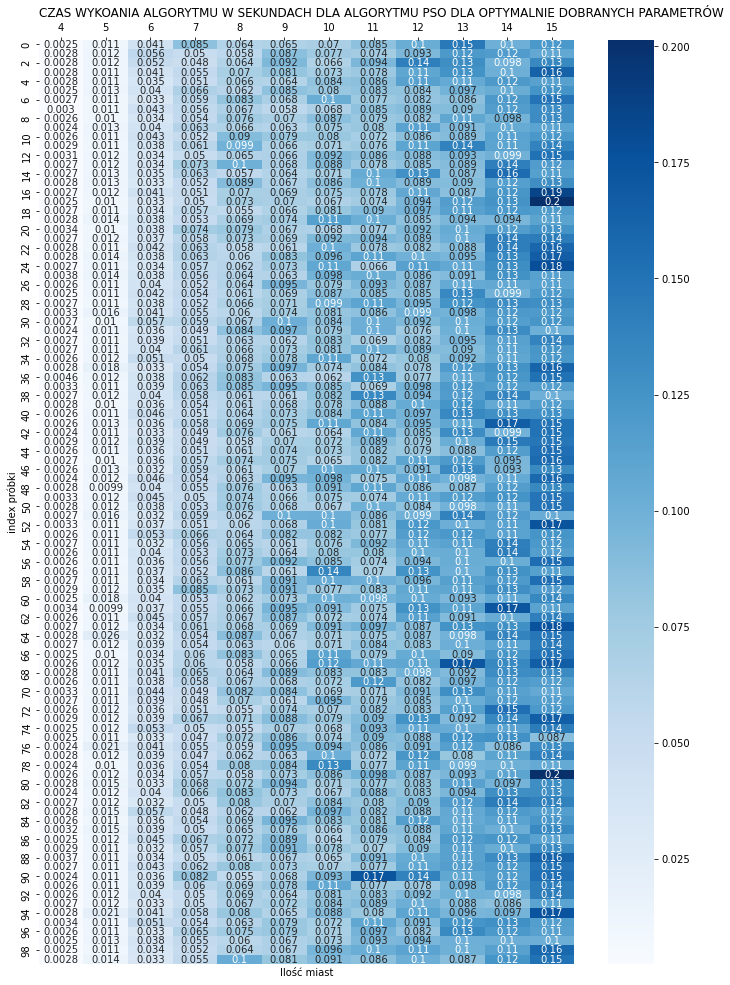

In [53]:
fig, ax = plt.subplots(figsize=(12,17))  
sns.heatmap(df2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
# xticks_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# yticks_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
# plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Ilość miast')
plt.ylabel('index próbki')

# title
title = 'Czas wykoania algorytmu w sekundach dla algorytmu PSO dla optymalnie dobranych parametrów'.upper()
plt.title(title, loc='left')
plt.savefig('time_exec_diagram.png')

In [48]:
DICTIONARY_TO_HEAT_TABLE =\
preapre_dictionary_to_heat_map_for_nr_cities_and_index_samples(df,"relative_distance_error")
df3 = pd.DataFrame.from_dict(DICTIONARY_TO_HEAT_TABLE)
df3

,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.977232,2.869594,7.911409,5.046588,9.320380
1,0.0,0.0,0.0,0.0,1.840654,0.000000,4.449990,9.797328,1.471177,2.881095,3.329780,11.899666
2,0.0,0.0,0.0,0.0,0.000000,0.000000,4.341538,0.000000,3.411345,0.000000,3.080424,8.366749
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.172416,0.000000,4.986143,15.111461,12.328113
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.264502,3.976995,9.492635
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,2.930841,0.000000,0.000000,1.566402,0.000000,6.124898,3.887270,5.018408
96,0.0,0.0,0.0,0.0,0.000000,1.667509,0.000000,1.181662,2.941266,4.205950,9.093255,0.000000
97,0.0,0.0,0.0,0.0,1.733082,0.000000,0.000000,0.145837,2.773026,8.542830,5.259331,6.025722
98,0.0,0.0,0.0,0.0,1.003554,0.000000,1.426559,13.030377,0.624631,3.784311,7.237443,0.807284


Text(0.0, 1.0, 'BŁĄD WZGLĘDNY DLA ALGORYTMU PSO DLA OPTYMALNIE DOBRANYCH PARAMETRÓW')

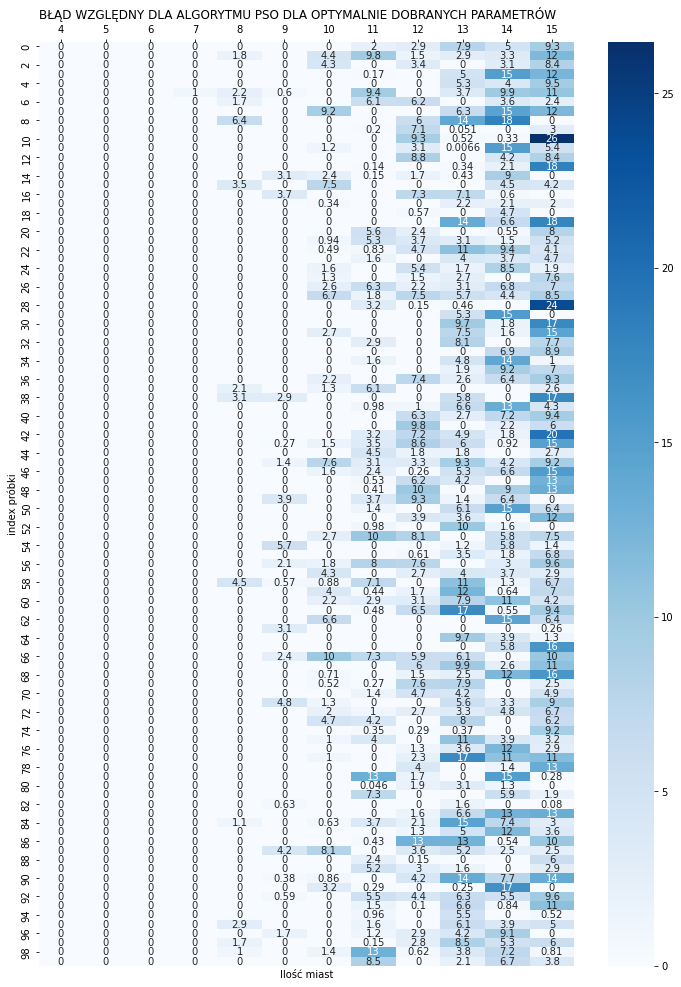

In [50]:
fig, ax = plt.subplots(figsize=(12,17))  
sns.heatmap(df3, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
plt.xlabel('Ilość miast')
plt.ylabel('index próbki')
# title
title = 'Błąd względny dla algorytmu PSO dla optymalnie dobranych parametrów'.upper()
plt.title(title, loc='left')

3. Opracowanie funkcji do zliczania danych

In [102]:

def generate_dictionary_alpha_beta(type_of_measure):
    configs = generate_config_combinations(type_of_measure)
    csv_results_by_alpha_beta = dict()
    for config in configs:
        name_of_csv = config[CSV_NAME]
        df = csv_results_dict[name_of_csv]
        alpha = config[ALPHA]
        beta = config[BETA]
        if alpha not in csv_results_by_alpha_beta:
            csv_results_by_alpha_beta[alpha] = dict()
            csv_results_by_alpha_beta[alpha][beta] = df
        else:
            csv_results_by_alpha_beta[alpha][beta] = df
    return csv_results_by_alpha_beta

def generate_data_fram_with_alpha_beta_and_optimal_percentage(csv_results_dict,type_of_measure, stat):
    # [NUMBER_OF_CITIES][4]-[15]
    # [0][MIN_RELATIVE_DISTANCE_ERROR]
    # .
    # [99]
    configs = generate_config_combinations(type_of_measure)
    names = csv_results_dict.keys()
    TABLE = dict()
    alpha_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    beta_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    csv_results_by_alpha_beta = generate_dictionary_alpha_beta(type_of_measure)
    for alpha in alpha_range:
        for beta in beta_range:
            df = csv_results_by_alpha_beta[alpha][beta]
            series = df["best_way_is_optimal"]
            true_false_percentage = series.value_counts(normalize=True, ascending = True)
            value = 0.0
            if stat == "optimal_to_all_percentage":
                value = true_false_percentage[0]
            elif stat == "not_optimal_to_all_percentage":
                value = true_false_percentage[1]
            if alpha not in TABLE:
                TABLE[alpha] = list()
                TABLE[alpha].append(value)
            else:
                TABLE[alpha].append(value)
    return TABLE

def generate_data_fram_with_stats(csv_results_dict,type_of_measure,column_name,  stat):
    # [NUMBER_OF_CITIES][4]-[15]
    # [0][MIN_RELATIVE_DISTANCE_ERROR]
    # .
    # [99]
    configs = generate_config_combinations(type_of_measure)
    names = csv_results_dict.keys()
    TABLE = dict()
    alpha_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    beta_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    csv_results_by_alpha_beta = generate_dictionary_alpha_beta(type_of_measure)
    for alpha in alpha_range:
        for beta in beta_range:
            df = csv_results_by_alpha_beta[alpha][beta]
            series = df[column_name]
            value = 0.0
            if stat == "min":
                value = series.min()
            elif stat == "avg":
                value = series.mean()
            elif stat == "max":
                value = series.max()
            elif stat == "stdev":
                value = series.std()
            elif stat == "sum":
                value = series.sum()
            elif stat == "log_sum":
                value = math.log(series.sum())
            elif stat == "q1":
                value = series.quantile(.25)
            elif stat == "q3":
                value = series.quantile(.75)
            if alpha not in TABLE:
                TABLE[alpha] = list()
                TABLE[alpha].append(value)
            else:
                TABLE[alpha].append(value)
    return TABLE     

4. Przygotowanie mapy ciepła dla danej wartości parametrów alfa i beta obrazującej wartość procentową ilości znalezionych optymalnych rozwiązań z użyciem algorytmu PSO

Text(0.0, 1.0, 'PROCENT ZNALEZIONYCH OPTYMALNYCH ROZWIĄZAŃ DLA DANEJ WARTOŚCI PARAMETRU ALPHA I BETA DLA ALGORYTMU PSO')

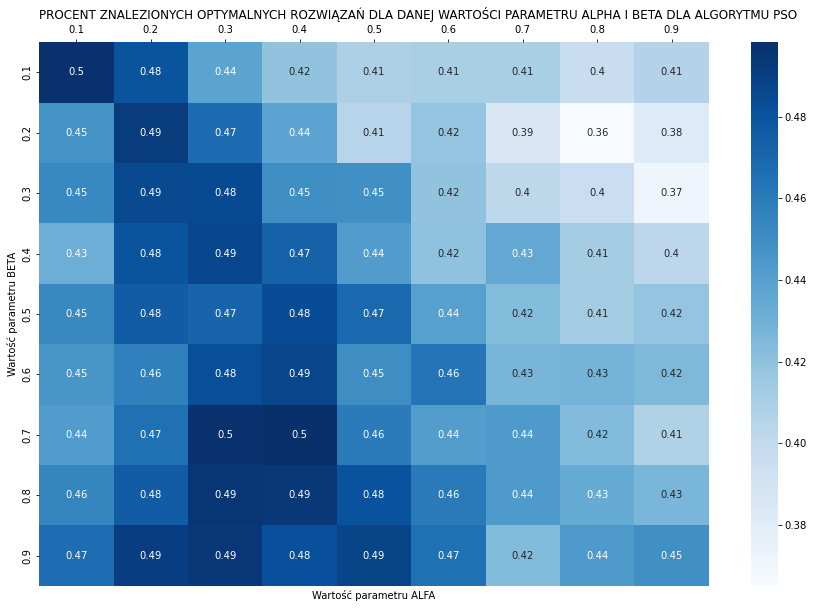

In [111]:
f = generate_data_fram_with_alpha_beta_and_optimal_percentage(csv_results_dict,
                                                              TIME_AND_DATA,
                                                              "optimal_to_all_percentage")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
yticks_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Wartość parametru ALFA')
plt.ylabel('Wartość parametru BETA')

# title
title = 'Procent znalezionych optymalnych rozwiązań dla danej wartości parametru ALPHA i BETA dla algorytmu PSO'.upper()
plt.title(title, loc='left')